# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
cc_trades = ta.get_coincheck_trades_df()
lq_trades = ta.get_liquid_trades_df()

In [8]:
len(cc_trades), len(lq_trades)

(16, 16)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                10660
           取引回数                   16
           開始日時  2020-05-07 07:08:24
           終了日時  2020-05-07 08:05:15
        取引時間[H]      0 days 00:56:51
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------


トレード結果
-----------  --------
開始[JPY]       13792
終了[JPY]       13755
利益[JPY]         -37
開始[BTC]    0.024299
終了[BTC]    0.024317
利益[BTC]     1.8e-05
開始[TOTAL]     37797
終了[TOTAL]     37878
利益[TOTAL]        81
-----------  --------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
       81         -17.786      98.786


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,cc_side,cc_price,lq_side,lq_price,profit
timestamp,,,,,
2020-05-07 07:08:24,buy,5949.993,sell,5951.094,1.101
2020-05-07 07:08:40,sell,5951.142,buy,5958.000,-6.858
2020-05-07 07:08:57,buy,5946.991,sell,5945.932,-1.059
2020-05-07 07:09:21,sell,5944.560,buy,5950.038,-5.478
2020-05-07 07:09:38,buy,5945.996,sell,5946.090,0.094
2020-05-07 07:11:53,sell,5939.778,buy,5943.354,-3.576
2020-05-07 07:14:28,buy,5940.992,sell,5942.148,1.156
2020-05-07 07:44:32,sell,5935.428,buy,5939.652,-4.224
2020-05-07 07:52:01,buy,5971.990,sell,5970.138,-1.852


In [12]:
round(sum(profit_df.profit), 3)

-37.083

## トレードグラフ

In [13]:
cc_ticks = ta.get_coincheck_ticks_df()
lq_ticks = ta.get_liquid_ticks_df()

In [14]:
len(cc_ticks), len(lq_ticks)

(10660, 10660)

In [15]:
cc_bids = cc_ticks['bid']
cc_asks = cc_ticks['ask']
lq_bids = lq_ticks['bid']
lq_asks = lq_ticks['ask']

fig1, ax1 = ta.get_fig(cc_bids, lq_asks)
fig2, ax2 = ta.get_fig(lq_bids, cc_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

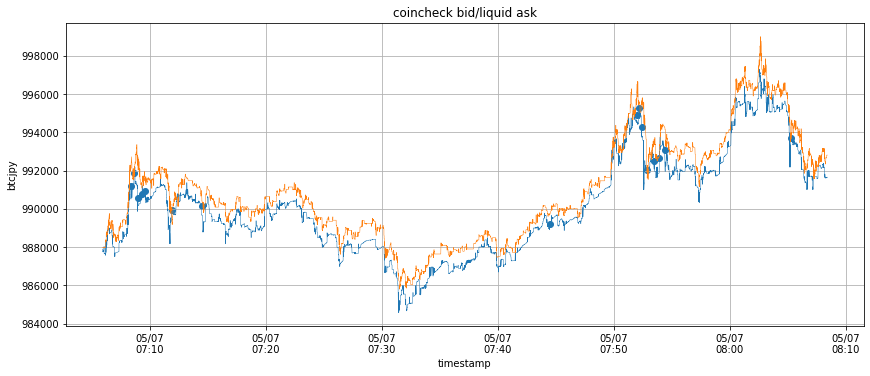

In [16]:
fig1

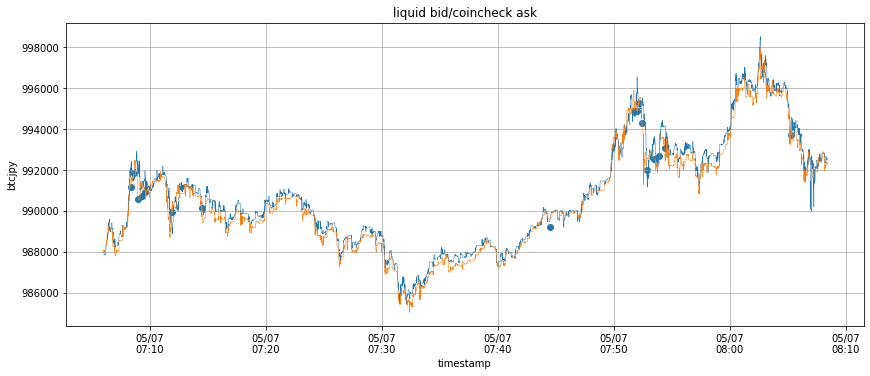

In [17]:
fig2